### Important variables 

Deptext = Depression text-response <br> 
Wortext = Worry text-response

dep_all_phraces = Depression all phraces responses <br> 
wor_all_phraces = Worry all phraces responses

dep_all_word = Depression all descriptive word responses <br>
wor_all_words = Worry all descriptive word responses

dep_all_selected1 = All selected depression word responses <br>
wor_all_selected1 = All selected worry word responses

<hr style="border:1px solid gray"> </hr>

CESDtot = Center for Epidemiological Studies Depression (CESD) <br>
PHQtot = PHQ-9 = Patient Helath Questionnaire = a depression scale

GADtot = GAD-7 = Generalized anxiety disorder scale <br>
PSWQtot = Penn State Worry Questionniare 

<hr style="border:1px solid gray"> </hr>

miniGAD_diagnose = Self-reported MINI (structured interview) GAD diangose <br>
minidep_diagnose = Self-reported MINI (structured interview) MDD (depression) diangose

#### Importing and cleaning dataset

In [63]:
import math
import numpy as np
import os
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [346]:
#Get relative directory to find path
path = os.path.join(os.getcwd(), 'data', 'response_format_cleaned_ds1.csv')
responses = pd.read_csv(path, sep=';', header=0)
responses.drop(responses.columns[[0]], axis=1, inplace=True)

# Drop rows with NA values in 'dep_all_words' column
responses = responses[~responses.dep_all_words.str.contains("NA NA NA NA NA")]
responses = responses.reset_index(drop=True)
responses.dropna(subset=['Deptext'], inplace=True)

responses

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,sequence1,seqOne,Dep5words[Word1],...,wor_all_selected,wor_all_selected1,minidep_scale,minidep_diagnose,depression_episodes,miniGAD_scale,miniGAD_symptoms_scale,miniGAD_diagnose,minidiagnose_category,minidiagnose_category_number
0,434.0,2020-08-07 11:46:22,15.0,en,6.593644e+08,2020-08-07 11:38:22,2020-08-07 11:46:22,2.0,1.0,motivated,...,NA NA happy NA NA NA NA NA NA NA NA NA NA care...,happy carefree satisfied ...,0.0,0,0,0,0,0,NoDi,0
1,184.0,2020-08-07 11:58:36,15.0,en,2.803892e+08,2020-08-07 11:34:31,2020-08-07 11:58:36,2.0,1.0,connected,...,anxious NA NA NA NA NA NA NA NA NA NA tense NA...,anxious tense fearful sad fe...,3.0,0,0,8,5,0,NoDi,0
2,330.0,2020-08-07 11:51:54,15.0,en,6.770686e+07,2020-08-07 11:36:32,2020-08-07 11:51:54,1.0,1.0,Yes,...,anxious NA NA NA NA NA worried NA NA NA NA NA ...,anxious worried scared sad mon...,7.0,0,5,9,5,0,NoDi,0
3,630.0,2020-08-07 13:22:42,15.0,en,1.176643e+09,2020-08-07 12:55:26,2020-08-07 13:22:42,3.0,1.0,minor,...,anxious NA NA NA NA concerned NA NA NA NA NA t...,anxious concerned tense scared ...,3.0,0,5,8,5,0,NoDi,0
4,400.0,2020-08-07 12:04:52,15.0,en,1.012492e+09,2020-08-07 11:37:19,2020-08-07 12:04:52,1.0,1.0,family,...,NA NA NA NA NA concerned NA NA NA NA NA tense ...,concerned tense sad tired ...,4.0,0,2,7,4,1,GAD,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,32.0,2020-08-07 12:02:58,15.0,en,1.363161e+09,2020-08-07 11:45:11,2020-08-07 12:02:58,3.0,1.0,Worried,...,anxious NA NA NA NA NA NA NA NA NA NA NA scare...,anxious scared uneasy fearful ...,9.0,1,1,0,0,0,Dep,1
958,344.0,2020-08-07 13:45:57,15.0,en,1.283747e+08,2020-08-07 13:32:04,2020-08-07 13:45:57,3.0,1.0,Tired,...,NA NA NA nervous NA NA worried NA NA NA NA NA ...,nervous worried stress anxie...,7.0,1,7,11,6,1,BOTH,3
959,297.0,2020-08-07 13:11:46,15.0,en,9.695994e+08,2020-08-07 12:52:04,2020-08-07 13:11:46,3.0,1.0,Unsettled,...,NA NA NA NA NA NA NA NA stressed NA NA NA scar...,stressed scared fearful anxi...,7.0,1,2,10,5,1,BOTH,3
960,241.0,2020-08-07 12:51:07,15.0,en,1.976520e+09,2020-08-07 12:28:54,2020-08-07 12:51:07,2.0,1.0,Despair,...,anxious NA NA NA NA NA worried NA stressed NA ...,anxious worried stressed uneasy ...,8.0,1,1,11,6,1,BOTH,3


In [347]:
def reclass_scale(num_array):
    def new_class(num):
        if 0 <= num <= 4: return 0
        elif 5 <= num <= 9: return 1 
        elif 10 <= num <= 14: return 2
        elif 15 <= num <= 19: return 3
        else: return 4
        
    return np.array([new_class(x) for x in num_array])

In [348]:
responses['PHQ_class'] = reclass_scale(responses.PHQtot.values)

### Dataset distribution for different classes of PHQ9 scale

In [349]:
print("Count responses with/without diagnosed depression:\n",responses.PHQ_class.value_counts())
#print("\nCount responses with/without diagnosed anxiety:\n",responses.miniGAD_diagnose.value_counts())

Count responses with/without diagnosed depression:
 0    212
1    204
3    201
2    170
4    168
Name: PHQ_class, dtype: int64


## Importing and cleaning semantic space 

In [14]:
"""
Using 5-gram contexts from the database, a co-occurrence (word by word) matrix was set up, 
where the rows contained the 120,000 most common words in the n-gram database and the columns 
consisted of the 10,000 most common words in the n-gram database.

The variable 'space' is a matrix of the semantic space with dimentions reduced to 512.
"""
path = os.path.join(os.getcwd(), 'data', 'spaceEnglish1.csv')
space = pd.read_csv(path, encoding= 'unicode_escape')
space.set_index('words', inplace=True)
space.drop(space.columns[[0]], axis=1, inplace=True)
space.dropna(inplace=True)
space = space[~space.index.duplicated(keep='first')]

In [15]:
space.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512
words,,,,,,,,,,,,,,,,,,,,,
was,-0.234071,-0.278211,-0.100658,-0.269570,-0.115498,-0.000038,-0.036835,0.024037,-0.003974,0.006582,...,-0.011414,0.018075,-0.020312,0.001287,0.024483,0.012867,0.021265,0.016368,0.024858,-0.020382
not,-0.283230,-0.338776,-0.141085,-0.243715,-0.236692,-0.033354,-0.099906,0.053253,-0.025582,-0.040372,...,-0.028472,0.048824,-0.025452,0.007828,0.027658,-0.022135,0.023037,0.005371,-0.001482,-0.024063
by,-0.251058,-0.327183,-0.203889,-0.283337,-0.124522,-0.006537,0.015371,0.131667,-0.130597,0.055605,...,-0.001550,0.027915,-0.012646,-0.005019,0.075544,0.014663,0.013489,-0.022636,0.010127,-0.027951
that,-0.281888,-0.346746,-0.171006,-0.266698,-0.208917,-0.019832,-0.035404,0.044301,-0.076601,0.021328,...,0.019319,0.042742,0.001747,0.019198,0.022598,0.034352,0.033282,-0.006843,0.027052,-0.013623
of,-0.256530,-0.335434,-0.229791,-0.256070,-0.120020,0.017080,0.078004,0.112134,-0.073805,0.098183,...,0.012012,0.005470,-0.022383,-0.042172,-0.003430,-0.013435,0.003697,-0.022769,0.024873,0.010061


### Methods for cleaning and aggregating semantic responses

In [35]:
def replace_nan(y_array):
    """
    Replaceing NaN values with mean value of column
    """
    col_mean = np.nanmean(y_array, axis=0)
    col_mean = np.around(col_mean, decimals=0, out=None) 
    inds = np.where(np.isnan(y_array))
    y_array[inds] = np.take(col_mean, inds[1])
    return y_array

def get_scale_y(): 
    """
    The numerical rating scales for depression and worry
    """
    dep_scale = responses[['PHQtot']]
    wor_scale = responses[['GADtot']]

    #Replace NaN Values for the numerical scales
    y_dep_scale = replace_nan(dep_scale.values).flatten()
    y_wor_scale = replace_nan(wor_scale.values).flatten()
    
    return y_dep_scale, y_wor_scale

def get_binary_y():
    """
    The categorical variables, whether someone is diagnosed with worry/dep or not
    """
    dep_diag = responses[['minidep_diagnose']]
    wor_diag = responses[['miniGAD_diagnose']]

    return dep_diag.values, wor_diag.values

In [36]:
"""
Cleans the string from punctuations and removes all words which are not represented in the semantic space. 
"""
words_in_space = set(space.index.values)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        try:
            tokens = word_tokenize(text)
            words = [lemmatizer.lemmatize(w.lower()) for w in tokens if w.isalpha()]
            words = [w for w in words if not w in stop_words] #Uncomment if stop words should be excluded
            cleaned_words = [w for w in words if w in words_in_space] # TODO: Hantera ord som inte finns i spacet. Nu ignoreras dem.
            return cleaned_words
        except Exception as e: 
            print(e)
    elif math.isnan(text):
        return []

In [37]:
"""
Controlling for artifacts relating to frequently occurring words.

1) Calculate, from Google N-gram, a frequency weighted average of all semantic representations in the space.
   (So that the weighting is proportional to how frequently the words occur in Google N-gram.)
2) Subtract this mean prior to aggregating each word, and then add to the final value.
"""

space_mean = pd.Series.to_numpy(space.mean())

def aggregating_words(responses):
    res_arr = np.zeros(512)
    
    for word in responses:
        word_arr = pd.Series.to_numpy(space.loc[word])
        res_arr = res_arr + (word_arr - space_mean)
    
    res_arr += space_mean    
    res_arr = res_arr / res_arr.sum() # Normalizing aggregated vector
    return res_arr

In [18]:
def aggregate_cell(text):
    words_in_cell = pd.Series.apply(text, clean_text)
    cell_vectors = pd.Series.apply(words_in_cell, aggregating_words)
    return cell_vectors

# Creating semantic embeddings using BERT

In [337]:
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [338]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-large-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bert_model = model_class.from_pretrained(pretrained_weights)

In [356]:
def get_words_embedding(word_list):
    tokenized_words = []
    
    for word in word_list:
        tokenized_words.append(tokenizer.encode(word, add_special_tokens=True))
    
    max_len = 0
    for i in tokenized_words:
        if len(i) > max_len:
            max_len = len(i)

    padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized_words])
    attention_mask = np.where(padded != 0, 1, 0)
    
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)

    with torch.no_grad():
        last_hidden_states = bert_model(input_ids, attention_mask=attention_mask)
    features = last_hidden_states[0][:,0,:]
    embeddings_mean = torch.mean(features, dim=0)
    
    return embeddings_mean.numpy()

In [341]:
def get_sentence_embeddings(sentence):
    idx_tokens = tokenizer.encode(sentence, add_special_tokens=True)

    segments_ids = [1] * len(idx_tokens)
    
    input_ids = torch.tensor([idx_tokens])  
    attention_mask = torch.tensor([segments_ids])

    with torch.no_grad():
        last_hidden_states = bert_model(input_ids, attention_mask=attention_mask)

    features = last_hidden_states[0][:,0,:].numpy()
    
    return features[0]

## Create df with embeddings for: text+words, only words or only text

In [358]:
def concat_vectors(row):
    return np.concatenate(row.values).ravel()

def create_aggregated_word_text_df():
    dep_columns = ['Deptext', 'dep_all_phraces', 'dep_all_words', 'dep_all_selected1']
    df_dep_responses = responses[dep_columns]
    df_dep_aggregated = df_dep_responses.apply(aggregate_cell, axis=1)
    df_dep_concat = pd.DataFrame(preprocessing.normalize(list(df_dep_aggregated.apply(concat_vectors, axis=1)), norm='l2'))
    
    return df_dep_concat

In [359]:
def create_aggregated_text_df(bert=False):
    deptext_series = responses[['Deptext']]
    if bert:
        return pd.DataFrame(list(responses['Deptext'].apply(get_sentence_embeddings)))
    else:
        aggregated = deptext_series.apply(aggregate_cell)
        return pd.DataFrame(preprocessing.normalize(list(aggregated.apply(concat_vectors, axis=1)), norm='l2'))

In [387]:
def create_aggregated_word_df(bert=False):
    df_words = responses['dep_all_words'] + responses['dep_all_selected1'] 
    
    if bert:
        return pd.DataFrame(list(df_words.apply(get_words_embedding).values))
    else: 
        aggregated = df_words.apply(clean_text)
        cell_vectors = pd.Series.apply(aggregated, aggregating_words)
        return pd.DataFrame(preprocessing.normalize(list(cell_vectors.values), norm='l2'))

### Initialize dataframes

In [362]:
words_text_embeddings = create_aggregated_word_text_df()
words_text_embeddings

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.062900,0.077957,-0.019374,0.002282,0.034784,-0.011714,-0.000689,0.005174,0.007242,0.006297,...,0.021852,0.004757,0.003749,-0.008672,-0.020326,-0.001926,-0.010678,0.025126,0.026308,0.000158
1,0.021085,0.024864,-0.015189,0.001486,0.011224,0.001927,0.001450,0.009439,-0.006474,0.004434,...,-0.008250,-0.000804,0.017080,-0.000816,0.007075,0.006578,0.005861,0.003488,0.012972,0.015320
2,0.122694,0.147977,-0.016826,0.022370,0.039333,-0.004768,-0.004677,-0.004871,-0.004547,-0.020250,...,0.033781,-0.041616,-0.020794,-0.006531,-0.054338,0.023218,0.023703,0.011586,0.007235,0.025810
3,0.015830,0.018365,-0.008750,0.004333,0.007202,-0.000364,0.000026,-0.002467,-0.003924,-0.003676,...,0.002062,0.000938,-0.000205,-0.002227,-0.003810,-0.000901,0.002942,-0.000358,-0.002690,0.005582
4,0.027532,0.034482,-0.011393,0.007954,0.013624,-0.001348,0.007237,0.005577,-0.007452,0.000592,...,-0.019412,-0.026557,0.002835,0.031839,0.044044,0.011921,-0.031023,-0.060413,0.004891,0.024220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.029426,0.036374,-0.015981,0.011364,0.014430,-0.006035,0.009566,-0.001776,-0.005559,-0.007110,...,-0.007951,-0.016552,-0.010350,0.023652,0.003101,-0.006876,-0.018588,-0.024012,0.020531,-0.008380
951,0.084236,0.102903,-0.037731,0.007176,0.019277,-0.010028,0.015602,0.021801,-0.008905,0.007323,...,0.028725,0.013039,0.004226,0.000605,-0.017060,-0.005172,0.017335,-0.006870,-0.007984,0.012158
952,0.039752,0.045894,-0.018065,-0.000739,0.007031,-0.001285,-0.008824,0.004931,-0.009761,-0.008538,...,0.042027,0.030174,0.006025,0.000518,-0.018788,0.006303,0.005728,0.023961,-0.011511,0.031055
953,0.064468,0.075092,-0.035479,-0.016570,0.012626,-0.012096,-0.013020,0.031303,-0.004701,0.000129,...,-0.032933,0.042261,-0.059266,0.001828,-0.045595,-0.026290,0.020923,0.016624,-0.016661,0.085674


In [363]:
bert_text_embeddings = create_aggregated_text_df(bert=True)
bert_text_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.517882,-0.537821,-0.989825,-0.110356,-0.032209,0.458721,-0.175854,0.403772,0.948488,0.091383,...,0.175257,0.492370,-1.065329,0.425254,0.373391,0.528245,-0.034103,-1.138229,-0.373919,0.162033
1,0.240635,-0.515735,-0.966278,0.192391,-0.568860,0.554965,-0.036733,0.307072,0.526065,0.334217,...,-0.068305,-0.509501,-0.695904,0.313641,-0.103439,0.595838,-0.000380,-0.833444,0.074788,0.103178
2,-0.363144,-0.890274,-1.491884,-0.196534,-0.287309,0.229247,0.368372,0.308629,0.284641,0.224274,...,0.038390,0.289749,-0.652852,-0.021086,0.348797,0.273776,0.219612,-0.947494,-0.302087,-0.137121
3,-0.198035,-0.541027,-0.834569,-0.289053,0.042794,0.361269,0.166197,0.476747,-0.019546,0.180131,...,-0.068371,0.225025,-0.771655,-0.162239,0.268308,1.000548,0.012397,-0.982535,-0.180496,-0.114411
4,-0.034927,-0.129658,-1.058793,-0.361135,-0.394683,0.574181,0.031253,0.508300,0.198039,0.558188,...,-0.121835,-0.252368,-0.316014,0.272936,0.293589,0.068764,0.679925,-1.015469,-0.103914,-0.295250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,-0.314795,-0.277388,-1.273265,-0.024252,-0.192891,0.272820,0.152954,0.140587,0.517532,-0.024848,...,0.282239,-0.007060,-0.830098,0.713039,0.069014,0.916848,0.139013,-1.366529,-0.129069,0.116312
951,0.195947,0.172161,-1.056904,-0.341447,-0.269734,-0.054921,-0.201306,0.116290,0.526034,0.676967,...,0.009463,-0.543837,-0.279615,-0.086111,-0.180672,0.419240,-0.026315,-0.981011,-0.601874,0.029296
952,-0.129765,-0.279229,-1.087020,-0.200553,0.047739,0.183195,0.165097,0.055697,0.147825,0.275026,...,0.127986,0.195202,-0.187017,0.323087,0.397821,0.594022,0.055826,-0.387985,-0.130426,0.050421
953,-0.184613,-0.502719,-0.793620,-0.098477,-0.039055,0.429851,0.095957,0.271169,-0.012750,0.171412,...,-0.311937,-0.169846,-0.413319,0.341108,0.131980,0.670311,0.371064,-1.022370,-0.141793,-0.182792


In [364]:
lsa_text_embeddings = create_aggregated_text_df()
lsa_text_embeddings

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.291869,0.361734,-0.089900,0.010589,0.161404,-0.054356,-0.003195,0.024007,0.033604,0.029218,...,0.022438,-0.052621,0.024976,-0.026581,0.024647,-0.009424,-0.013131,0.009460,-0.005705,-0.048390
1,0.293229,0.345779,-0.211228,0.020670,0.156090,0.026792,0.020165,0.131263,-0.090032,0.061659,...,0.047943,0.024059,-0.018777,-0.015305,0.032256,0.009590,-0.068359,0.008508,-0.022818,-0.008008
2,0.304636,0.367410,-0.041776,0.055543,0.097661,-0.011837,-0.011613,-0.012093,-0.011290,-0.050278,...,0.015510,0.028381,-0.006428,-0.019379,-0.022584,0.044741,-0.047788,-0.012919,0.055983,0.009187
3,0.231514,0.268581,-0.127966,0.063364,0.105329,-0.005325,0.000382,-0.036077,-0.057393,-0.053756,...,0.087126,-0.020535,-0.003779,0.026250,0.011244,-0.013058,-0.024843,-0.070400,-0.048662,-0.055839
4,0.327208,0.409813,-0.135405,0.094526,0.161922,-0.016026,0.086014,0.066287,-0.088567,0.007037,...,0.017719,0.034968,0.003101,-0.015867,0.034048,0.029264,0.009277,0.043349,0.006951,-0.034510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.286717,0.354412,-0.155714,0.110726,0.140601,-0.058806,0.093203,-0.017304,-0.054165,-0.069274,...,0.081323,0.077959,0.007018,0.017724,-0.024925,0.006762,-0.021199,-0.047926,0.005070,-0.032578
951,0.330376,0.403588,-0.147980,0.028146,0.075606,-0.039330,0.061189,0.085503,-0.034924,0.028719,...,0.029733,-0.032260,-0.004288,-0.009905,0.080044,0.029310,-0.044805,0.006628,0.022572,0.023353
952,0.228019,0.263251,-0.103619,-0.004238,0.040332,-0.007370,-0.050615,0.028286,-0.055991,-0.048977,...,0.005651,-0.028486,-0.030558,0.022113,0.066475,-0.050752,0.060659,0.025761,0.056340,-0.056173
953,0.286038,0.333174,-0.157416,-0.073521,0.056019,-0.053668,-0.057769,0.138890,-0.020858,0.000574,...,0.008547,-0.021855,-0.033301,-0.050232,0.031534,0.027040,0.044573,0.024326,0.046346,0.002767


In [365]:
bert_words_embeddings = create_aggregated_word_df(bert=True)
bert_words_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.149705,-0.623167,0.200526,-0.326759,0.154330,-0.406463,0.007245,0.482404,0.329975,0.036406,...,0.033405,-0.366916,-1.103754,0.453866,0.061235,0.071582,0.531448,-0.330277,-0.230097,0.399398
1,-0.149410,-0.604080,0.207231,-0.307021,0.205802,-0.369556,0.036153,0.479378,0.351763,0.036391,...,0.056870,-0.340406,-1.119255,0.493912,0.081360,0.087516,0.514052,-0.317621,-0.237164,0.389339
2,-0.183499,-0.651730,0.228173,-0.401176,0.249527,-0.389254,0.029192,0.467756,0.333677,0.040266,...,0.070043,-0.363925,-1.115371,0.518460,0.117983,0.064497,0.485502,-0.318418,-0.229166,0.433757
3,-0.170021,-0.645437,0.220243,-0.369084,0.231657,-0.370826,0.020174,0.481995,0.367547,0.031390,...,0.090196,-0.363312,-1.103262,0.537117,0.111451,0.088700,0.498792,-0.323115,-0.230200,0.387433
4,-0.220619,-0.621417,0.234264,-0.403858,0.286542,-0.349532,0.061576,0.516226,0.351463,0.023638,...,0.118051,-0.351315,-1.114348,0.525592,0.137408,0.086455,0.468292,-0.342892,-0.225636,0.376902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,-0.184510,-0.624469,0.212087,-0.353404,0.243767,-0.360778,0.037498,0.510639,0.361965,0.018476,...,0.078930,-0.337524,-1.129160,0.483365,0.096496,0.110531,0.499497,-0.349424,-0.226529,0.380829
951,-0.226209,-0.594886,0.221327,-0.384875,0.244178,-0.387549,0.072772,0.497376,0.306359,0.045177,...,0.115880,-0.351239,-1.076188,0.537163,0.128798,0.038969,0.454326,-0.331715,-0.255605,0.386931
952,-0.207660,-0.627972,0.215566,-0.381716,0.228441,-0.377633,0.026342,0.488355,0.348570,0.067367,...,0.078811,-0.362805,-1.111505,0.471760,0.098712,0.081115,0.491306,-0.330432,-0.229556,0.386280
953,-0.223172,-0.607518,0.212108,-0.384727,0.247113,-0.374087,0.052704,0.515279,0.348313,0.044912,...,0.104412,-0.374450,-1.105152,0.543125,0.121703,0.065742,0.462617,-0.345780,-0.243959,0.390463


In [388]:
lsa_words_embeddings = create_aggregated_word_df()
lsa_words_embeddings

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.105878,-0.084428,0.156354,0.096105,-0.080766,-0.048279,0.163958,0.006778,-0.048451,0.039886,...,0.031072,0.009250,0.003117,0.005223,-0.028999,0.000387,-0.003075,0.031526,0.033312,-0.021645
1,-0.151870,-0.169378,0.111367,0.068819,-0.065358,-0.020020,0.162600,0.052622,-0.043084,0.031186,...,0.020599,0.009929,0.012561,0.047466,0.034704,0.008567,0.025656,0.015285,0.057653,-0.027074
2,0.083865,0.050005,-0.203582,-0.124028,0.067654,-0.029199,-0.057302,0.073032,0.067792,-0.058979,...,0.011376,0.078406,-0.045153,0.050121,0.056262,-0.014174,0.016875,0.000524,-0.064037,0.000042
3,0.090724,0.057273,-0.190178,-0.037223,0.015987,-0.059534,-0.099162,0.022779,0.078145,-0.013057,...,-0.007340,-0.004886,-0.022226,0.038388,0.051698,-0.030643,-0.079592,0.044302,0.042800,-0.069308
4,0.163091,0.166514,-0.139702,-0.004539,0.030738,0.044637,0.062611,-0.021321,0.039962,0.003671,...,-0.026008,0.008422,0.007125,0.006919,0.042910,0.009231,-0.015440,-0.010745,0.036977,0.064578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,-0.106933,-0.077401,0.192300,0.106363,-0.103356,-0.053462,0.082180,-0.075539,-0.013223,0.022298,...,-0.012990,0.028999,-0.000557,-0.073471,-0.009542,-0.043610,0.030301,0.061651,-0.030608,-0.000109
951,-0.063710,-0.016520,0.229395,0.059587,-0.076839,-0.020652,0.086393,-0.032477,-0.035915,0.031315,...,0.030296,0.069683,-0.024992,-0.003830,-0.058011,0.001070,0.032114,-0.007552,-0.008972,0.058190
952,0.068788,0.017254,-0.243110,-0.086328,0.085702,-0.004001,-0.115187,0.013293,0.029579,-0.033549,...,-0.057384,-0.019468,-0.015669,-0.034590,0.016852,-0.028772,-0.035553,-0.042599,0.020317,-0.019733
953,-0.070020,-0.012812,0.243353,0.070386,-0.064374,0.026875,0.102016,-0.062446,0.017412,0.010496,...,-0.040142,0.002886,-0.063879,-0.009188,-0.018404,-0.011506,0.000703,-0.036482,-0.001013,0.049322


## Dimensionality reduction using PCA or UMAP

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import umap

In [ ]:
"""Using data prepeared with PCA """

def reduce_dim_pca(X, k=100, split=True, sparse=False):
    
    minmax_scaler = MinMaxScaler(feature_range=[0, 1])
    scaler = StandardScaler()
    reducer = PCA(n_components=k)

    Y = reclass_scale(get_scale_y()[0])
    
    if not sparse:
        Y = to_categorical(Y)

    if split: 
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)
        
        X_train =reducer.fit_transform(X_train)
        X_test = reducer.transform(X_test)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    else: 
        X = reducer.fit_transform(X)
        X = scaler.fit_transform(X)
        
        return X, Y

In [ ]:
"""Using data prepeared with UMAP """

def reduce_dim_umap(X, k=100, split=True, sparse=False):
    
    scaler = MinMaxScaler(feature_range=[0, 1])
    
    Y = reclass_scale(get_scale_y()[0])
    
    if not sparse:
        Y = to_categorical(Y)
    
    reducer = umap.UMAP(n_components=k)
    
    if split: 
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)
        
        X_train = reducer.fit_transform(X_train)
        X_test = reducer.transform(X_test)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    else: 
        X = reducer.fit_transform(X)
        X = scaler.fit_transform(X)
        
        return X, Y

In [56]:
def check_data_balance(class_data=reclass_scale(get_scale_y()[0])):
    class_data = class_data.flatten()
    scale_series = pd.Series(class_data)
    scale_cnt = pd.DataFrame(scale_series.value_counts(), columns=['count'])
    scale_cnt['prop'] = (scale_cnt/scale_cnt.sum())*100

    return scale_cnt

# Using the Semantic Representations in Analyses

Import packages needed for analysis

In [170]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from numpy import mean, std

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import statistics
from numpy import arange

## Analysis using ridge multiple regression and PHQ classes as dependent variable 

**Mean Absolute Error (MAE):** $$MAE = \frac{1}{n}\sum^n_{i=1}|y_i-\hat{y_i}|$$
**Mean Squared Error (MSE):** $$MSE = \frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2$$
**Root Mean Squared Error (RMSE):** = $$RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2}$$

MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

In [276]:
X_train, X_test, y_train, y_test = reduce_dim_umap(k=220, split=True, sparse=True)

In [277]:
print(X_train.shape)
print(y_train.shape)

check_data_balance(y_train)

(769, 220)
(769,)


,count,prop
0,170,22.106632
3,168,21.846554
1,158,20.546164
2,143,18.595579
4,130,16.905072


In [305]:
ridge_model = Ridge(alpha=.05).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [306]:
print("R2 score data:  ", ridge_model.score(X_test, y_test)) 

print("\nRMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_pred, y_test))
print("MSE: ", metrics.mean_squared_error(y_pred, y_test))

R2 score data:   0.4686789571555683

RMSE: 1.055931387187252
MAE:  0.8582614641733121
MSE:  1.1149910944471941


In [307]:
"""
Spearmans correlation assesses how well the relationship between two 
variables can be described using a monotonic function.
"""
corr, _ = spearmanr(y_pred, y_test)
print('Spearmans correlation: ', corr)

Spearmans correlation:  0.6894509051025951


In [308]:
X, y = reduce_dim_umap(k=220, split=False, sparse=True)

#### With cross validation

In [310]:
ridge_model_CV = RidgeCV(cv=5).fit(X, y)
ridge_model_CV.score(X, y)

0.4252595192117118

# Results table Ridge Regression w/ dependent variable PHQ classes 

|           | Embedding     | Dim reduction | Spearmans  | R2  |
| :-------- | :------------:|:-------------:|: -----:|:----:| 
| **Words + Text** | LSA           | PCA           |  | |
| **Words + Text** | LSA           | UMAP          |  | |
| | | | | |
| | | | | |
| **Words**        | LSA           | PCA           |  | |
| **Words**        | LSA           | UMAP          |  | |
| **Words**        | BERT          | PCA           |  | |
| **Words**        | BERT          | UMAP          |  | |
| | | | | |
| | | | | |
|**Text**          | LSA           | PCA           |     | |
|**Text**          | LSA           | UMAP          |     | |
|**Text**          | BERT          | PCA           |     | |
|**Text**          | BERT          | UMAP          |     | |

## Analysis using Multilayer Perceptron Neural Network for multi-class classification

In [111]:
model = Sequential()
model.add(Dense(220, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 220)               48620     
_________________________________________________________________
dropout_69 (Dropout)         (None, 220)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 200)               44200     
_________________________________________________________________
dropout_70 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)               25728     
_________________________________________________________________
dropout_71 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 5)               

In [112]:
history = model.fit(X_train, y_train, batch_size=50, epochs=150, verbose=0, validation_data=(X_test, y_test))

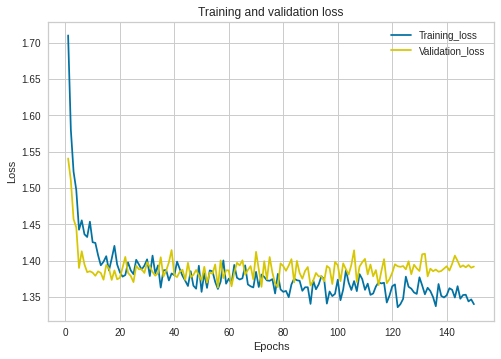

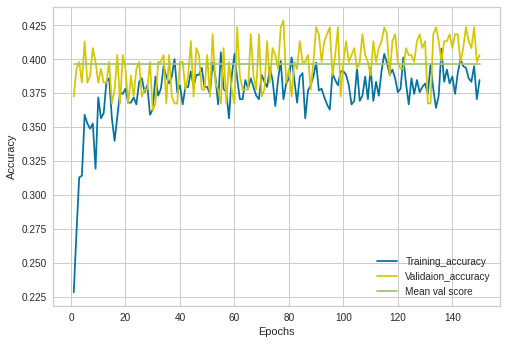

In [113]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 151)
plt.plot(epochs, loss, 'b', label='Training_loss')
plt.plot(epochs, val_loss, 'y', label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'y', label='Validaion_accuracy')
plt.plot(epochs, [statistics.mean(val_acc)]*len(epochs), 'g', label='Mean val score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [127]:
y_pred_check = np.argmax(model.predict(X_test),axis=1)
y_test_check = y_test
#y_test_check = np.argmax(y_test,axis=1) 

print(classification_report(y_test_check, y_pred_check))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        49
           1       0.30      0.27      0.29        37
           2       0.67      0.06      0.11        34
           3       0.31      0.92      0.46        39
           4       0.00      0.00      0.00        37

    accuracy                           0.40       196
   macro avg       0.40      0.38      0.31       196
weighted avg       0.42      0.40      0.33       196



/home/ma42/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ma42/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ma42/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Using GridSearch / CrossValidations

In [130]:
X, y = get_umap_dep_data(k=220, split=False, sparse=True)

In [131]:
print(X.shape)
print(y.shape)

check_data_balance(np.argmax(y, axis=-1))

(976, 220)
(976, 5)


,count,prop
0,213,21.823770
1,207,21.209016
3,203,20.799180
2,184,18.852459
4,169,17.315574


In [132]:
def baseline_model():
    model = Sequential()
    model.add(Dense(220, input_dim=220, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [133]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=50, verbose=0)
kfold = KFold(n_splits=7, shuffle=True)

In [134]:
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 39.96% (4.23%)
